In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Homework 7

## Problem 1: The Iris Dataset

load the iris dataset

In [4]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/iris.data'
iris_data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','species'])
iris_data.head(5) #show first 5 rows

sepal length  sepal width  petal length  petal width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Cluster the flowers using k-means and hierarchical clustering, and ensure that you have a good number of clusters (using the "elbow" method, for example). 
Compare the results obtained by the two methods.

## Problem 2: Clustering for Color Segmentation

*Image segmentation* is the task of partitioning an image into multiple segments. 
In *color segmentation*, all pixels that are part of the same segments get assigned to the same color.

Load the ladybug image:

In [5]:
from matplotlib.image import imread
url = 'https://raw.githubusercontent.com/um-perez-alvaro/clustering/master/ladybug.png'
image = imread(url)

The image is represented as a 3D array

In [6]:
image.shape

(533, 800, 3)

The first dimension's size is the height; the second is the width; and the third is the number of color channels, in this case red, green and blue (RGB)

(-0.5, 799.5, 532.5, -0.5)

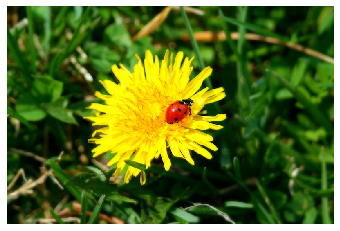

In [11]:
plt.imshow(image)
plt.axis('off')

The following code reshapes the array to get a long list of RGB colors (The resulting matrix $X$ has one row for each pixel)

In [14]:
X = image.reshape(-1,3)
X.shape

(426400, 3)

Cluster the pixels (i.e., the rows of $X$) using the k-means algorithm.
Next, replace each pixel (i.e., each row of $X$) by its cluster mean. 
Plot the resulting image for k=2, 4, 6, 8, 10 and 12. 

## Problem 3: the Olivetti Faces Dataset

The Olivetti faces dataset contains 400 grayscale 64 × 64 pixel images of faces. 
Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each).

In [15]:
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces()
images, labels = data.images, data.target

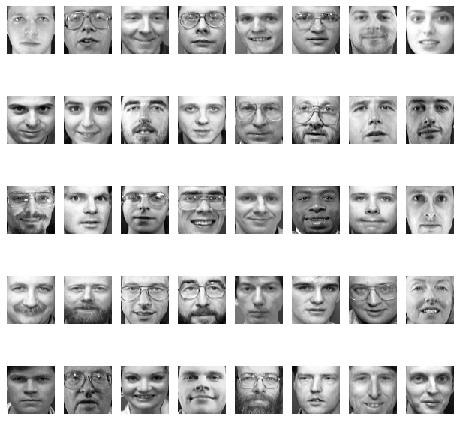

In [16]:
plt.figure(figsize=(8,8))
for i in range(40):
    plt.subplot(5,8,i+1)
    plt.imshow(images[i*10],cmap='gray')
    plt.axis('off')

Cluster the images using k-means or hierarchical clustering, and ensure that you have a good number of clusters using the silhouette score method.
 You might expect the optimal number of clusters to be 40, since there are 40 different people on the pictures. However, the same person may look quite different on different pictures (e.g., with or without glasses, or simply shifted left or right).

Visualize the clusters: do you see similar faces in each cluster?

## Problem 4: Playing with Spectral Clustering

Use spectral clustering to find the two clusters in the following datasets.

**Dataset 1: Eye of Sauron**

<IPython.core.display.Javascript object>


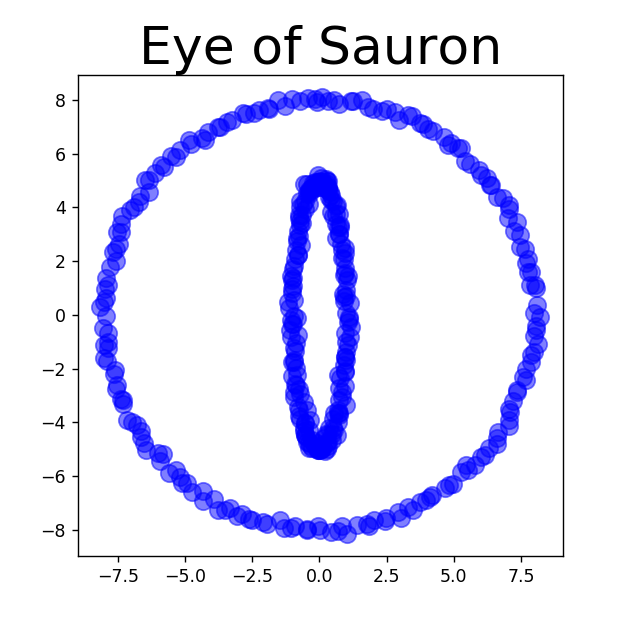

Text(0.5, 1.0, 'Eye of Sauron')

In [32]:
X = np.zeros((400,2))

# cluster 1:
theta = np.linspace(0,2*np.pi,200) 
X[0:200,0] = 8*np.sin(theta)+0.1*np.random.randn(200)
X[0:200,1] = 8*np.cos(theta)+0.1*np.random.randn(200)
# cluster 2:
X[200:400,0] = 1*np.sin(theta)+0.1*np.random.randn(200)
X[200:400,1] = 5*np.cos(theta)+0.1*np.random.randn(200)

plt.figure(figsize=(5,5))
plt.plot(X[:,0],X[:,1],'bo',alpha=0.5,markersize=10)
plt.title('Eye of Sauron',fontsize=30)

**Dataset 2: connected circles**

<IPython.core.display.Javascript object>


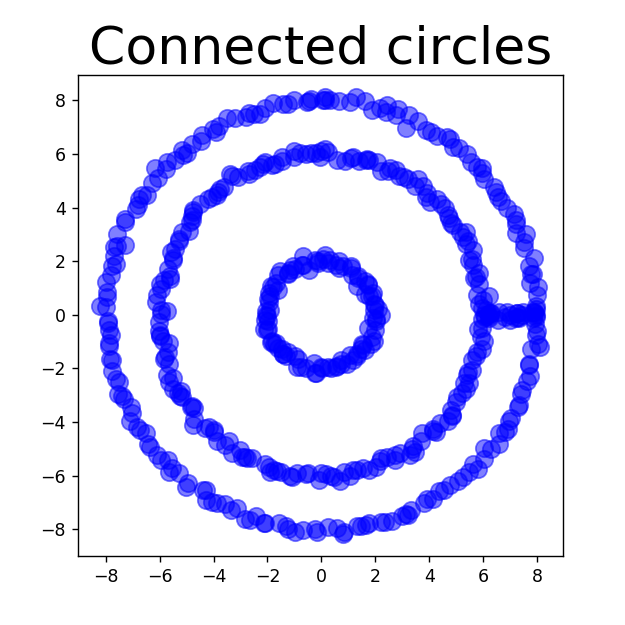

Text(0.5, 1.0, 'Connected circles')

In [27]:
X = np.zeros((525,2))

# cluster 1:
theta = np.linspace(0,2*np.pi,200) 
X[0:200,0] = 8*np.sin(theta)+0.1*np.random.randn(200)
X[0:200,1] = 8*np.cos(theta)+0.1*np.random.randn(200)

X[200:400,0] = 6*np.sin(theta)+0.1*np.random.randn(200)
X[200:400,1] = 6*np.cos(theta)+0.1*np.random.randn(200)

X[400:425,0] = 6 + 2*np.random.rand(25)
X[400:425,1] = 0.1*np.random.randn(25)

# cluster 2:
theta = np.linspace(0,2*np.pi,100)
X[425:525,0] = 2*np.sin(theta)+0.1*np.random.randn(100)
X[425:525,1] = 2*np.cos(theta)+0.1*np.random.randn(100)

plt.figure(figsize=(5,5))
plt.plot(X[:,0],X[:,1],'bo',alpha=0.5,markersize=10)
plt.title('Connected circles',fontsize=30)

**Dataset 3: interlocked rings (3D)**

In [24]:
from mpl_toolkits.mplot3d import Axes3D 
#the next line will allow you to rotate the 3d graph
%matplotlib notebook 

<IPython.core.display.Javascript object>


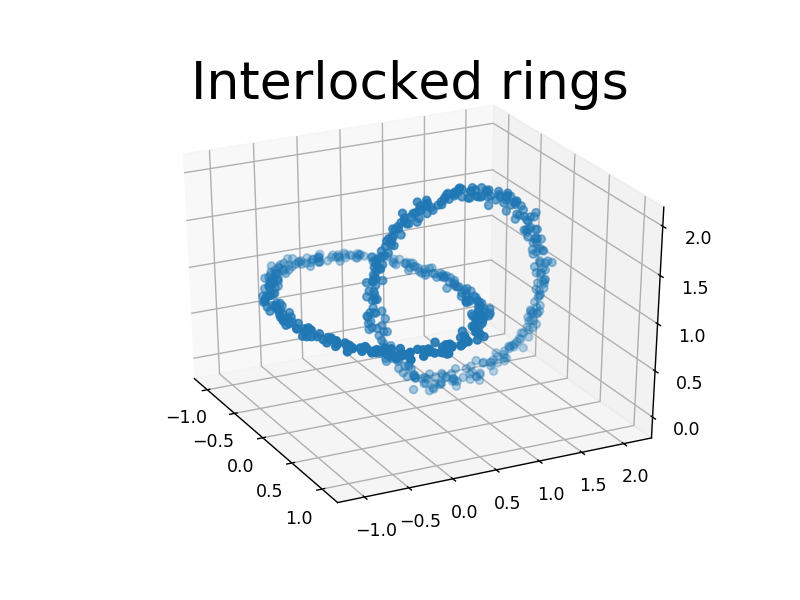

Text(0.5, 0.92, 'Interlocked rings')

In [25]:
X = np.zeros((600,3))

# cluster 1:
theta = np.linspace(0,2*np.pi,300) 
X[0:300,0] = np.sin(theta)+0.05*np.random.randn(300)
X[0:300,1] = np.cos(theta)+0.05*np.random.randn(300)
X[0:300,2] = np.ones(300)

# cluster 2:
X[300:600,0] = np.zeros(300)
X[300:600,1] = np.sin(theta)+1+0.05*np.random.randn(300)
X[300:600,2] = np.cos(theta)+1+0.05*np.random.randn(300)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2])
plt.title('Interlocked rings',fontsize=30)

## Problem 5: Greedy Initialization of k-means

Consider the following initialization method which we denote as the *greedy* initialization method:

1. For the first cluster center, pick one of the dataset points at random.

2. Pick each remaining cluster center as the dataset point as far from the remaining centroids as possible.

Consider the following dataset:

In [30]:
X = np.zeros((700,2))

X[:100] = 0.1*np.random.randn(100,2) + [-3,1.25] # blob 1
X[100:200] = 0.1*np.random.randn(100,2) + [-3,1.75] # blob 2
X[200:300] = 0.1*np.random.randn(100,2) + [-3,2.75] # blob 3
X[300:500] = 0.4*np.random.randn(200,2) + [-1.5,2.25] # blob 4
X[500:700] = 0.5*np.random.randn(200,2) + [1,2.25] # blob 5

plt.figure(figsize=(12,5))
plt.plot(X[:,0],X[:,1],'bo',alpha=0.5)

<IPython.core.display.Javascript object>

Plot the k-means' initial clusters (with $k=5$) if:

1. the initial cluster's centers are randomly chosen from the dataset points

2. the initial cluster's centers are chosen using the greedy initialization